In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential,layers,Input
from tensorflow.keras.models import Model



print(tf.__version__)

gpus = tf.config.list_physical_devices(device_type='GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
except:
    print('Error!')
    pass

2.4.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
data1_1 = pd.read_csv('1Hz1.csv',header=None) #传感器1采集的信号
data1_2 = pd.read_csv('1Hz2.csv',header=None) #传感器2采集的信号
data1 = pd.concat([data1_1, data1_2])

In [3]:
data1

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,38.320,38.332,38.320,38.324,38.332,38.324,38.348,38.332,38.336,38.316,...,38.523,38.539,38.578,38.531,38.523,38.566,38.613,38.590,38.578,38.594
1,38.680,38.672,38.668,38.668,38.742,38.742,38.750,38.742,38.742,38.781,...,39.168,39.246,39.246,39.254,39.250,39.246,39.246,39.238,39.234,39.250
2,39.234,39.246,39.246,39.250,39.246,39.250,39.254,39.246,39.332,39.332,...,39.914,39.988,39.996,40.016,40.035,40.062,40.047,40.043,40.051,40.043
3,40.086,40.047,40.102,40.078,40.043,40.078,40.051,40.070,40.023,40.078,...,40.828,40.844,40.820,40.852,40.895,40.879,40.934,40.922,40.922,40.922
4,40.934,40.922,40.922,40.914,40.922,40.922,40.926,40.871,40.871,40.867,...,41.668,41.668,41.719,41.750,41.695,41.777,41.762,41.762,41.758,41.758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,30.383,30.375,30.379,30.363,30.367,30.391,30.383,30.363,30.375,30.402,...,30.383,30.395,30.406,30.383,30.406,30.422,30.402,30.395,30.402,30.379
2201,30.367,30.375,30.441,30.457,30.441,30.445,30.457,30.469,30.457,30.480,...,30.395,30.391,30.402,30.383,30.391,30.406,30.395,30.391,30.406,30.375
2202,30.375,30.375,30.367,30.375,30.367,30.375,30.379,30.367,30.367,30.391,...,30.480,30.484,30.480,30.488,30.480,30.480,30.484,30.395,30.480,30.379
2203,30.379,30.367,30.379,30.363,30.375,30.379,30.379,30.379,30.375,30.391,...,30.418,30.395,30.402,30.406,30.406,30.406,30.402,30.391,30.406,30.375


In [4]:
data2_1 = pd.read_csv('10Hz1.csv',header=None) #传感器1采集的信号
data2_2 = pd.read_csv('10Hz2.csv',header=None) #传感器1采集的信号
data2 = pd.concat([data2_1, data2_2])

In [6]:
data2

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,8.990,0.770,0.641,0.006,0.000,0.000,0.001,0.003,0.001,0.001,...,7.743,7.992,7.919,7.773,7.955,7.823,7.963,7.876,7.738,8.036
1,8.919,0.815,0.709,0.009,0.004,0.000,0.001,0.000,0.000,0.001,...,7.831,8.003,7.923,7.745,7.867,7.747,7.969,7.969,7.963,7.890
2,9.179,0.683,0.528,0.008,0.003,0.001,0.003,0.003,0.004,0.006,...,7.862,7.815,7.894,7.743,7.936,7.770,7.982,7.873,7.898,7.952
3,9.034,0.728,0.595,0.009,0.001,0.004,0.003,0.003,0.003,0.001,...,7.631,7.949,7.773,8.054,7.827,8.011,7.919,7.938,7.877,7.773
4,8.729,0.705,0.446,0.014,0.007,0.003,0.001,0.003,0.001,0.000,...,7.771,7.936,7.919,7.946,7.804,7.983,7.838,7.882,7.894,7.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,10.196,10.189,10.180,10.201,10.176,10.200,10.185,10.193,10.182,10.190,...,10.193,10.174,10.170,10.176,10.170,10.170,10.194,10.187,10.154,10.171
2201,10.182,10.194,10.189,10.181,10.186,10.167,10.166,10.198,10.171,10.166,...,10.172,10.182,10.191,10.185,10.176,10.170,10.171,10.190,10.187,10.174
2202,10.171,10.169,10.178,10.182,10.203,10.171,10.177,10.187,10.171,10.183,...,10.189,10.174,10.169,10.150,10.162,10.183,10.182,10.185,10.185,10.171
2203,10.166,10.194,10.189,10.180,10.173,10.163,10.162,10.185,10.189,10.181,...,10.187,10.198,10.185,10.185,10.189,10.189,10.172,10.165,10.184,10.189


In [7]:
data3 = pd.read_csv('100Hz.csv',header=None)
data3 = pd.concat([data3, data3]) #数据填补
data3

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,2411.6,2411.6,2411.6,2411.6,2411.6,2411.6,2411.6,2411.6,2411.6,2409.6,...,2409.6,2409.2,2409.6,2409.4,2409.6,2409.4,2409.6,2409.6,2409.6,2409.6
1,2409.6,2409.6,2409.6,2409.6,2409.6,2409.6,2409.6,2409.6,2409.6,2409.6,...,2398.8,2398.2,2398.2,2398.0,2398.0,2398.0,2398.0,2397.8,2397.8,2397.8
2,2397.8,2397.8,2397.8,2397.8,2397.8,2397.8,2397.8,2397.8,2397.8,2395.8,...,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8
3,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2382.8,2382.8,...,2373.2,2372.8,2372.6,2372.4,2372.2,2372.0,2372.0,2372.0,2372.0,2372.0
4,2372.0,2372.0,2372.0,2372.0,2372.0,2372.0,2372.0,2372.0,2372.0,2373.0,...,2370.0,2370.0,2369.8,2369.8,2369.8,2369.8,2369.6,2369.6,2369.6,2369.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2416.4,2416.4,2416.4,2416.4,2416.4,2416.4,2416.4,2416.4,2416.4,2416.4,...,2415.6,2415.2,2415.6,2415.4,2415.6,2415.4,2415.6,2415.6,2415.6,2415.6
2201,2415.6,2415.6,2415.6,2415.6,2415.6,2415.6,2415.6,2415.6,2415.6,2415.6,...,2414.6,2414.6,2414.0,2414.0,2413.8,2413.8,2413.6,2413.6,2413.6,2413.6
2202,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,...,2413.6,2413.6,2412.6,2413.6,2413.2,2413.6,2413.4,2413.6,2413.4,2413.6
2203,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,...,2413.8,2413.8,2413.8,2414.8,2415.8,2415.2,2415.6,2415.4,2415.6,2415.6


In [8]:
data3

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,2411.6,2411.6,2411.6,2411.6,2411.6,2411.6,2411.6,2411.6,2411.6,2409.6,...,2409.6,2409.2,2409.6,2409.4,2409.6,2409.4,2409.6,2409.6,2409.6,2409.6
1,2409.6,2409.6,2409.6,2409.6,2409.6,2409.6,2409.6,2409.6,2409.6,2409.6,...,2398.8,2398.2,2398.2,2398.0,2398.0,2398.0,2398.0,2397.8,2397.8,2397.8
2,2397.8,2397.8,2397.8,2397.8,2397.8,2397.8,2397.8,2397.8,2397.8,2395.8,...,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8
3,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2382.8,2382.8,...,2373.2,2372.8,2372.6,2372.4,2372.2,2372.0,2372.0,2372.0,2372.0,2372.0
4,2372.0,2372.0,2372.0,2372.0,2372.0,2372.0,2372.0,2372.0,2372.0,2373.0,...,2370.0,2370.0,2369.8,2369.8,2369.8,2369.8,2369.6,2369.6,2369.6,2369.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2416.4,2416.4,2416.4,2416.4,2416.4,2416.4,2416.4,2416.4,2416.4,2416.4,...,2415.6,2415.2,2415.6,2415.4,2415.6,2415.4,2415.6,2415.6,2415.6,2415.6
2201,2415.6,2415.6,2415.6,2415.6,2415.6,2415.6,2415.6,2415.6,2415.6,2415.6,...,2414.6,2414.6,2414.0,2414.0,2413.8,2413.8,2413.6,2413.6,2413.6,2413.6
2202,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,...,2413.6,2413.6,2412.6,2413.6,2413.2,2413.6,2413.4,2413.6,2413.4,2413.6
2203,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,...,2413.8,2413.8,2413.8,2414.8,2415.8,2415.2,2415.6,2415.4,2415.6,2415.6


In [9]:
Labels = pd.read_csv('profile.csv',header=None)
Labels = pd.concat([Labels, Labels]) #标签填补至4410
Labels

,0,1,2,3,4
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1
...,...,...,...,...,...
2200,100,100,0,90,0
2201,100,100,0,90,0
2202,100,100,0,90,0
2203,100,100,0,90,0


In [10]:
#数据归一化
scaler = StandardScaler()
sample1_scaler = scaler.fit_transform(data1)
sample2_scaler = scaler.fit_transform(data2)
sample3_scaler = scaler.fit_transform(data3)

# 标签修改

In [16]:
label1 = Labels[0]   #100，20，3
label2 = Labels[1]   #100,90,80,73
label3 = Labels[2]   #0,1,2
label4 = Labels[3]   #130,115,100,90

In [17]:
label = label2  #标签修改
label = label.replace(100,0)
label = label.replace(90,1)
label = label.replace(80,2)
label = label.replace(73,3)

In [18]:
# 多通道输入数据：三个通道的训练集、测试集划分
# channel 1：
x1_train, x1_test, y_train, y_test = train_test_split(sample1_scaler, label,test_size=0.2, random_state=42)
# channel 2：
x2_train, x2_test, y_train, y_test = train_test_split(sample2_scaler, label,test_size=0.2, random_state=42)
# channel 3：
x3_train, x3_test, y_train, y_test = train_test_split(sample3_scaler, label,test_size=0.2, random_state=42)

# Multi-input CNN model

In [19]:
def built_model():
    INPUT1 = Input(shape=(60,1), name='channel1') 
    INPUT2 = Input(shape=(600,1), name='channel2') 
    INPUT3 = Input(shape=(6000,1), name='channel3') 
    
    x = layers.Conv1D(8, 3, 3, activation = 'relu')(INPUT1)
    x = layers.Conv1D(16, 3, 3, activation = 'relu')(x)
    x = layers.Conv1D(32, 3, 3, activation = 'relu')(x)
    x =  layers.Flatten()(x)

    
    y = layers.Conv1D(8, 3, 3, activation = 'relu')(INPUT2)
    y = layers.Conv1D(16, 3, 3, activation = 'relu')(y)
    y = layers.Conv1D(32, 3, 3, activation = 'relu')(y)
    y =  layers.Flatten()(y)

    
    z = layers.Conv1D(8, 3, 3, activation = 'relu')(INPUT3)
    z = layers.Conv1D(16, 3, 3, activation = 'relu')(z)
    z = layers.Conv1D(32, 3, 3, activation = 'relu')(z)
    z =  layers.Flatten()(z)

    
    concatenated = layers.concatenate([x, y, z])
    FC = layers.Dropout(0.25)(concatenated)
    FC = layers.Dense(512, activation = 'relu')(FC)
    OUTPUT = layers.Dense(4, activation='softmax', name='output')(FC)
    
    model = Model([INPUT1, INPUT2, INPUT3], OUTPUT)
    return model

model = built_model()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
channel1 (InputLayer)           [(None, 60, 1)]      0                                            
__________________________________________________________________________________________________
channel2 (InputLayer)           [(None, 600, 1)]     0                                            
__________________________________________________________________________________________________
channel3 (InputLayer)           [(None, 6000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 20, 8)        32          channel1[0][0]                   
____________________________________________________________________________________________

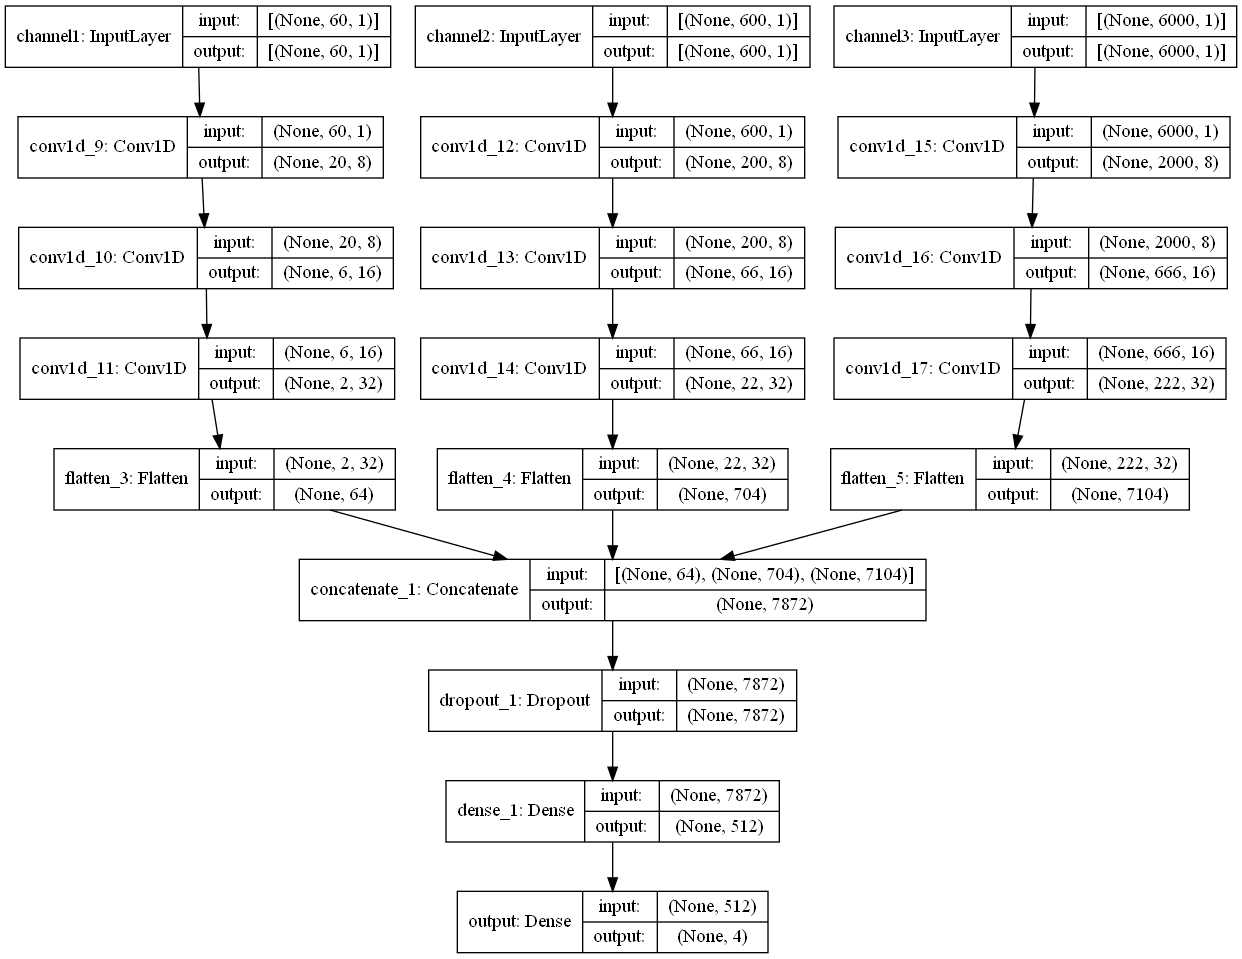

In [20]:
tf.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
# 编译步骤
# compiling the model（编译模型）
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['acc'])
# fitting the model（拟合模型）
history = model.fit([x1_train, x2_train, x3_train],y_train,epochs=200,batch_size=32,validation_split=0.25)

In [22]:
# evaluting the model（测试，评估）
test_scores = model.evaluate([x1_test,x2_test,x3_test],y_test)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

28/28 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 0.9989
Test loss: 0.002204215619713068
Test accuracy: 0.9988662004470825


<function matplotlib.pyplot.show(close=None, block=None)>

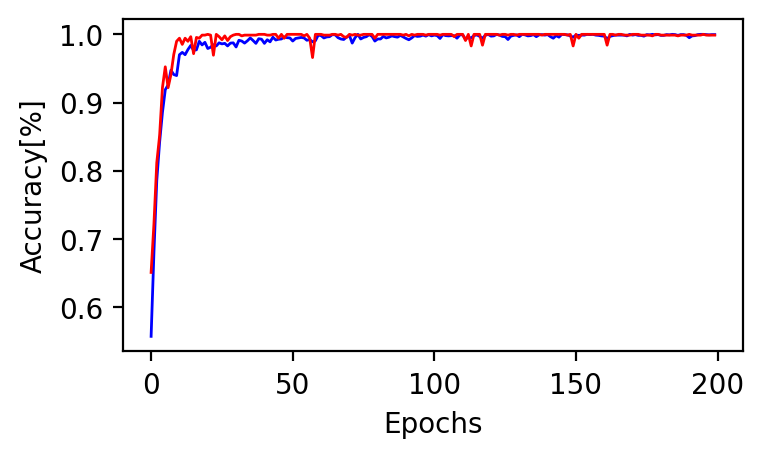

In [23]:
#准确率
plt.figure(figsize =(4,2.2),dpi=200)
plt.plot(history.history['acc'], 'b-', label='acc',linewidth=1)
plt.plot(history.history['val_acc'], 'r-', label='val_acc',linewidth=1)
# plt.title('train_acc vs val_acc')
plt.ylabel('Accuracy[%]')
plt.xlabel('Epochs')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

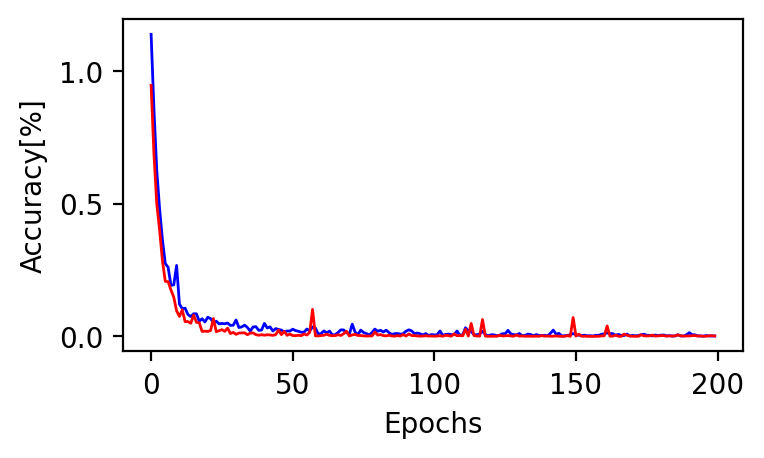

In [24]:
# 损失
plt.figure(figsize =(4,2.2),dpi=200)
plt.plot(history.history['loss'], 'b-',linewidth=1)
plt.plot(history.history['val_loss'], 'r-',linewidth=1)
# plt.title('train_acc vs val_acc')
plt.ylabel('Accuracy[%]')
plt.xlabel('Epochs')
plt.show

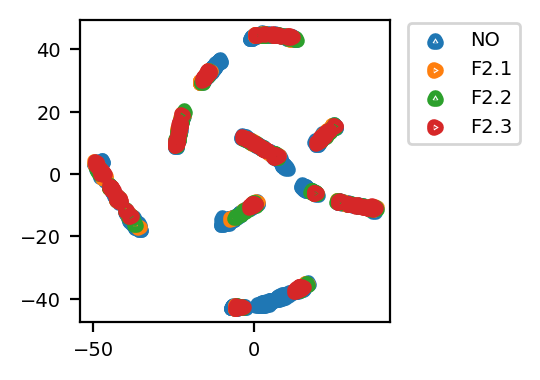

In [26]:
# 原始数据可视化

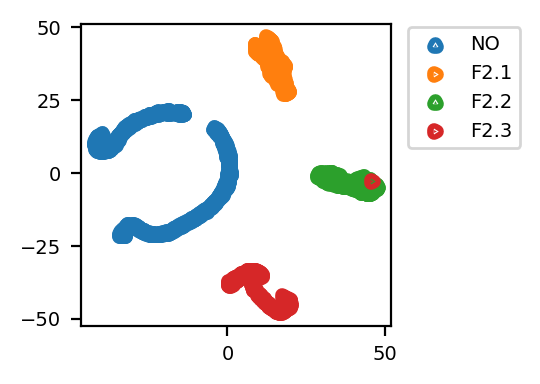

In [29]:
# 输出可视化